In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

df = pd.read_csv("C:/Users/DELL/Downloads/data_jobs.csv")
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_da = df[df['job_title_short']=='Data Analyst'].copy()

In [3]:
df_da['job_posted_month_no'] = df_da['job_posted_date'].dt.month

In [4]:
df_da_exploded = df_da.explode('job_skills')

In [7]:
df_da_pivot = df_da_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [20]:
df_da_pivot.loc['total'] = df_da_pivot.sum()

df_da_pivot = df_da_pivot[df_da_pivot.loc['total'].sort_values(ascending=False).index]

df_da_pivot =df_da_pivot.drop('total')


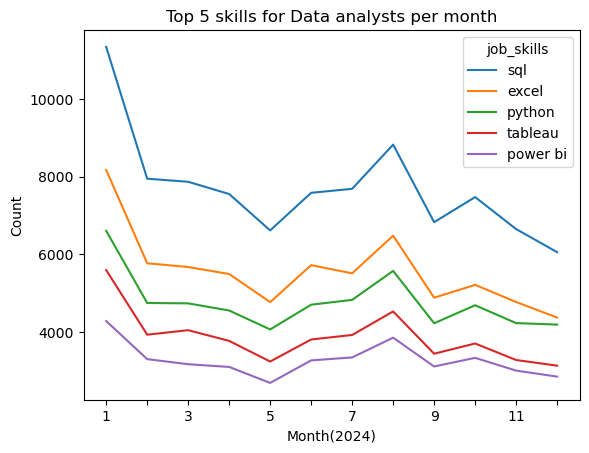

In [28]:
df_da_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 skills for Data analysts per month')
plt.xlabel('Month(2024)')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(0, 12))
plt.show()